In [2]:
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"
import csv

## S1(C2)

### Forgetness  @ Triplets  (F@20, F@50, F@100)

In [50]:
with open('Final_Results_Data_for_plots/S1/S1(C2) Results Final - common_test_set.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    all_f_s1_results = []
    for i, row in enumerate(csv_reader):
        print(row)
        if '@' in row[0]:
            fig_title = 'F'+row[0][1:]
            x_labels = ['T'+x[1] for x in row[1:]]
            results = [fig_title,x_labels,[]]
        elif row[0] == '':
            continue
        elif row[0] == 'EWC':
            row = [row[0]] + [float(row[x]) - float(row[1]) for x in range(1,len(row))]

            results[-1].append(row)
            # add dummy results for joint training
            results[-1].append(['Joint Training (Dummy)'] + [0] * 5)
            all_f_s1_results.append(results)
        else:
            row = [row[0]] + [float(row[x]) - float(row[1]) for x in range(1,len(row))]
            results[-1].append(row)
        

['R@20', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '28.7', '0.0059', '0.0013', '0', '0']
['Replay', '28.7', '12.6', '14.72', '10.79', '1.49']
['Infinite Replay', '28.7', '24.1', '27.3', '23.3', '22.5']
['EWC', '28.7', '8.2', '1.05', '0.76', '0.3']
['', '', '', '', '', '']
['R@50', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '32.88', '0.0154', '0.0027', '0.0001', '0']
['Replay', '32.88', '19.56', '20.03', '16.71', '4.58']
['Infinite Replay', '32.88', '29.04', '31.45', '27.8', '25.6']
['EWC', '32.88', '10.2', '1.3', '0.8', '0.4']
['', '', '', '', '', '']
['R@100', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '35.66', '0.0228', '0.0037', '0.0001', '0']
['Replay', '35.66', '24.05', '24.08', '20.48', '8.28']
['Infinite Replay', '35.66', '32.08', '34.67', '31.5', '29.3']
['EWC', '35.66', '11.1', '1.5', '0.88', '0.45']


### Avg Recall @ Triplets (Avg R@20, Avg R@50, Avg R@100)

In [51]:
with open('Final_Results_Data_for_plots/S1/S1(C2) Results Final - average_recall_test_Set.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    all_avg_s1_results = []
    for i, row in enumerate(csv_reader):
        print(row)
        if '@' in row[0]:
            fig_title = 'Avg. ' + row[0]
            x_labels = ['T'+x[1] for x in row[1:]]
            results = [fig_title,x_labels,[]]
        elif row[0] == '':
            continue
        elif row[0] == 'EWC':
            results[-1].append(row)
            # add dummy results for joint training
            results[-1].append(['Joint Training (Dummy)'] + [row[1]] * 5)
            all_avg_s1_results.append(results)
        else:
            results[-1].append(row)
        

['R@20', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '28.7', '0.0059', '0.0013', '0', '0']
['Replay', '28.7', '12.6', '14.72', '10.79', '1.49']
['Infinite Replay', '28.7', '24.1', '27.3', '23.3', '22.5']
['EWC', '28.7', '8.2', '1.05', '0.76', '0.3']
['', '', '', '', '', '']
['R@50', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '32.88', '0.0154', '0.0027', '0.0001', '0']
['Replay', '32.88', '19.56', '20.03', '16.71', '4.58']
['Infinite Replay', '32.88', '29.04', '31.45', '27.8', '25.6']
['EWC', '32.88', '10.2', '1.3', '0.8', '0.4']
['', '', '', '', '', '']
['R@100', 'M1', 'M2', 'M3', 'M4', 'M5']
['Naive', '35.66', '0.0228', '0.0037', '0.0001', '0']
['Replay', '35.66', '24.05', '24.08', '20.48', '8.28']
['Infinite Replay', '35.66', '32.08', '34.67', '31.5', '29.3']
['EWC', '35.66', '11.1', '1.5', '0.88', '0.45']


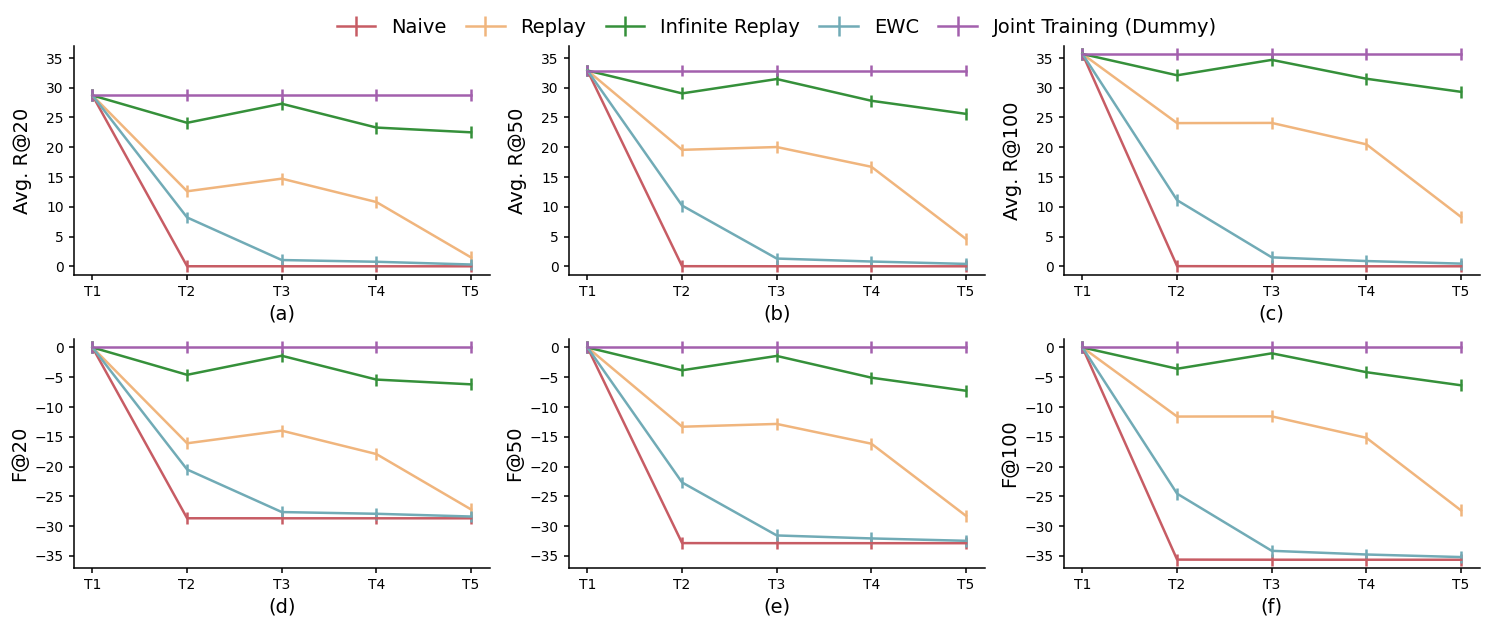

In [52]:
fig, axes = plt.subplots(2, 3,figsize=(15, 6))
color_map = ['#C75C64','#F0B57D', '#35903A', '#71ABB6','#A360AD','#206E9E']
subtitles = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]

for i, results in enumerate(all_avg_s1_results):
    fig_title = results[0]
    x_labels = results[1]
    numbers = results[2]
#     print(fig_title)
    for j, result in enumerate(numbers):
#         print(i, result)
        ys = [float(y) for y in result[1:]]
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[0,i].errorbar(range(1,6),ys,yerr=1.0,  color=color_map[j],label=result[0],lw=1.8)

#         axes[i].set_title(fig_title)
        axes[0,i].set_xticks(range(1,6),x_labels)
        axes[0,i].set_ylim([-1.5,37])
        axes[0,i].spines[['right', 'top']].set_visible(False)
        axes[0,i].set_ylabel(fig_title, fontsize=14, labelpad=10.0) 
        axes[0,i].set_xlabel(subtitles[0][i], fontsize=14) 
        for axis in ['top','bottom','left','right']:
            axes[0,i].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[0,i].tick_params(width=1.1)

for i, results in enumerate(all_f_s1_results):
    fig_title = results[0]
    x_labels = results[1]
    numbers = results[2]
#     print(fig_title)
    for j, result in enumerate(numbers):
#         print(i, result)
        ys = [float(y) for y in result[1:]]
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[1,i].errorbar(range(1,6),ys,yerr=1.0,  color=color_map[j],label=result[0],lw=1.8)

#         axes[i].set_title(fig_title)
        axes[1,i].set_xticks(range(1,6),x_labels)
        axes[1,i].set_ylim([-37.0, 1.5])
        axes[1,i].spines[['right', 'top']].set_visible(False)
        axes[1,i].set_ylabel(fig_title, fontsize=14) 
        axes[1,i].set_xlabel(subtitles[1][i], fontsize=14) 
        for axis in ['top','bottom','left','right']:
            axes[1,i].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[1,i].tick_params(width=1.1)
fig.tight_layout()        
axes[0,1].legend(loc='upper center',ncols=5, bbox_to_anchor=(0,0.2,1,1),prop={'size': 14},frameon=False, columnspacing=1)


## S2(C4)

### Forgetness  @ Triplets  (F@20, F@50, F@100)

In [15]:
with open('Final_Results_Data_for_plots/S2/c4 - Final_results_common_test_set.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    all_f_s2_results = []
    for i, row in enumerate(csv_reader):
        print(row)
        if '@' in row[0]:
            fig_title = 'F'+row[0][1:]
            x_labels = ['T'+x[1] for x in row[1:]]
            results = [fig_title,x_labels,[]]
        elif row[0] == '':
            continue
        elif row[0] == 'EWC':
            row = [row[0]] + [float(row[x]) - float(row[1]) for x in range(1,len(row))]

            results[-1].append(row)
            # add dummy results for joint training
            results[-1].append(['Joint Training (Dummy)'] + [0] + [-1] * 2)
            all_f_s2_results.append(results)
        else:
            row = [row[0]] + [float(row[x]) - float(row[1]) for x in range(1,len(row))]
            results[-1].append(row)
        

['R@20', 'M1', 'M2', 'M3']
['Naive', '23.22', '0', '0']
['Replay(10%)', '23.22', '0.5', '1.43']
['Replay(20%)', '23.22', '2.05', '5.95']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['R@50', 'M1', 'M2', 'M3']
['Naive', '27.97', '0', '0']
['Replay(10%)', '27.97', '0.7', '2.27']
['Replay(20%)', '27.97', '2.82', '8.27']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['R@100', 'M1', 'M2', 'M3']
['Naive', '31.55', '0', '0']
['Replay(10%)', '31.55', '0.9', '3.23']
['Replay(20%)', '31.55', '3.67', '10.01']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']


In [9]:
all_f_s2_results

[['F@20',
  ['T1', 'T2', 'T3'],
  [['Naive', 0.0, -23.22, -23.22],
   ['Replay(10%)', 0.0, -22.72, -21.79],
   ['Replay(20%)', 0.0, -21.169999999999998, -17.27],
   ['Infinite Replay', 0.0, 0.0, 0.0],
   ['EWC', 0.0, 0.0, 0.0],
   ['Joint Training (Dummy)', 0, 0, 0]]],
 ['F@50',
  ['T1', 'T2', 'T3'],
  [['Naive', 0.0, -27.97, -27.97],
   ['Replay(10%)', 0.0, -27.27, -25.7],
   ['Replay(20%)', 0.0, -25.15, -19.7],
   ['Infinite Replay', 0.0, 0.0, 0.0],
   ['EWC', 0.0, 0.0, 0.0],
   ['Joint Training (Dummy)', 0, 0, 0]]],
 ['F@100',
  ['T1', 'T2', 'T3'],
  [['Naive', 0.0, -31.55, -31.55],
   ['Replay(10%)', 0.0, -30.650000000000002, -28.32],
   ['Replay(20%)', 0.0, -27.880000000000003, -21.54],
   ['Infinite Replay', 0.0, 0.0, 0.0],
   ['EWC', 0.0, 0.0, 0.0],
   ['Joint Training (Dummy)', 0, 0, 0]]]]

### Avg Recall @ Triplets (Avg R@20, Avg R@50, Avg R@100)

In [18]:
with open('Final_Results_Data_for_plots/S2/c4 - Final_results_average_recall.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    all_avg_s2_results = []
    for i, row in enumerate(csv_reader):
        print(row)
        if '@' in row[0]:
            fig_title = 'Avg. ' + row[0]
            x_labels = ['T'+x[1] for x in row[1:]]
            results = [fig_title,x_labels,[]]
        elif row[0] == '':
            continue
        elif row[0] == 'EWC':
            results[-1].append(row)
            # add dummy results for joint training
            results[-1].append(['Joint Training (Dummy)'] + [25.0] * 3)
            all_avg_s2_results.append(results)
        else:
            results[-1].append(row)
        

['R@20', 'M1', 'M2', 'M3']
['Naive', '23.22', '0.51', '0']
['Replay(10%)', '23.22', '1.81', '1.99']
['Replay(20%)', '23.22', '2.57', '6.22']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['R@50', 'M1', 'M2', 'M3']
['Naive', '27.97', '0.69', '0']
['Replay(10%)', '27.97', '2.71', '3.23']
['Replay(20%)', '27.97', '4.11', '8.54']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['R@100', 'M1', 'M2', 'M3']
['Naive', '31.55', '0.8', '0']
['Replay(10%)', '31.55', '3.38', '4.36']
['Replay(20%)', '31.55', '5.51', '10.71']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']


['Naive', '23.22', '0.51', '0']
['Replay(10%)', '23.22', '1.81', '1.99']
['Replay(20%)', '23.22', '2.57', '6.22']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['Joint Training (Dummy)', 25.0, 25.0, 25.0]
['Naive', '27.97', '0.69', '0']
['Replay(10%)', '27.97', '2.71', '3.23']
['Replay(20%)', '27.97', '4.11', '8.54']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['Joint Training (Dummy)', 25.0, 25.0, 25.0]
['Naive', '31.55', '0.8', '0']
['Replay(10%)', '31.55', '3.38', '4.36']
['Replay(20%)', '31.55', '5.51', '10.71']
['Infinite Replay', '0', '0', '0']
['EWC', '0', '0', '0']
['Joint Training (Dummy)', 25.0, 25.0, 25.0]


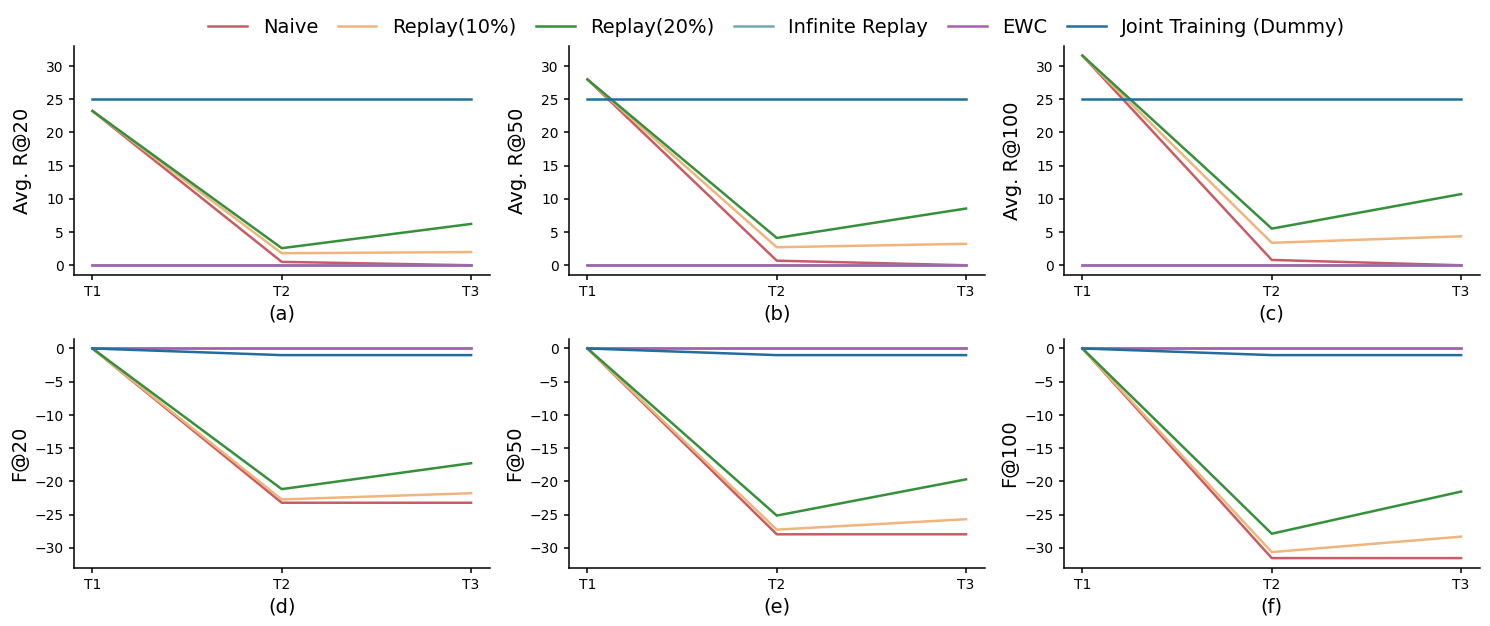

In [74]:
fig, axes = plt.subplots(2, 3,figsize=(15, 6))
color_map = ['#C75C64','#F0B57D', '#35903A', '#71ABB6','#A360AD','#206E9E']
subtitles = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]

for i, results in enumerate(all_avg_s2_results):
    fig_title = results[0]
    x_labels = results[1]
    numbers = results[2]
#     print(fig_title)
    for j, result in enumerate(numbers):
#         print(i, result)
        ys = [float(y) for y in result[1:]]
        print(result)
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[0,i].plot(range(1,4),ys,color=color_map[j],label=result[0],lw=1.8)

#         axes[i].set_title(fig_title)
        axes[0,i].set_xticks(range(1,4),x_labels)
        axes[0,i].set_ylim([-1.5,33])
        axes[0,i].spines[['right', 'top']].set_visible(False)
        axes[0,i].set_ylabel(fig_title, fontsize=14, labelpad=10.0) 
        axes[0,i].set_xlabel(subtitles[0][i], fontsize=14) 
        for axis in ['top','bottom','left','right']:
            axes[0,i].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[0,i].tick_params(width=1.1)

for i, results in enumerate(all_f_s2_results):
    fig_title = results[0]
    x_labels = results[1]
    numbers = results[2]
#     print(fig_title)
    for j, result in enumerate(numbers):
#         print(i, result)
        ys = [float(y) for y in result[1:]]
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[1,i].plot(range(1,4),ys,color=color_map[j],label=result[0], lw=1.8)

#         axes[i].set_title(fig_title)
        axes[1,i].set_xticks(range(1,4),x_labels)
        axes[1,i].set_ylim([-33.0, 1.5])
        axes[1,i].spines[['right', 'top']].set_visible(False)
        axes[1,i].set_ylabel(fig_title, fontsize=14) 
        axes[1,i].set_xlabel(subtitles[1][i], fontsize=14) 
        for axis in ['top','bottom','left','right']:
            axes[1,i].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[1,i].tick_params(width=1.1)
fig.tight_layout()        
axes[0,1].legend(loc='upper center',ncols=6, bbox_to_anchor=(0,0.2,1,1),prop={'size': 14},frameon=False, columnspacing=1)


In [45]:
# fig, axes = plt.subplots(2, 3,figsize=(15, 6))
# color_map = ['#C75C64','#F0B57D', '#35903A', '#71ABB6','#A360AD','#206E9E']
# subtitles = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]

# for i, results in enumerate(all_avg_s2_results):
#     fig_title = results[0]
#     x_labels = results[1]
#     numbers = results[2]
# #     print(fig_title)
#     for j, result in enumerate(numbers):
# #         print(i, result)
#         ys = [float(y) for y in result[1:]]
#         print(ys)
# #         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
#         axes[0,i].errorbar(range(1,4),ys,yerr=1.0,  color=color_map[j],label=result[0],lw=1.8)

# #         axes[i].set_title(fig_title)
#         axes[0,i].set_xticks(range(1,4),x_labels)
#         axes[0,i].set_ylim([-1.5,33])
#         axes[0,i].spines[['right', 'top']].set_visible(False)
#         axes[0,i].set_ylabel(fig_title, fontsize=14, labelpad=10.0) 
#         axes[0,i].set_xlabel(subtitles[0][i], fontsize=14) 
#         for axis in ['top','bottom','left','right']:
#             axes[0,i].spines[axis].set_linewidth(1.1)

#         # increase tick width
#         axes[0,i].tick_params(width=1.1)

# for i, results in enumerate(all_f_s2_results):
#     fig_title = results[0]
#     x_labels = results[1]
#     numbers = results[2]
# #     print(fig_title)
#     for j, result in enumerate(numbers):
# #         print(i, result)
#         ys = [float(y) for y in result[1:]]
# #         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
#         axes[1,i].errorbar(range(1,4),ys,yerr=1.0,  color=color_map[j],label=result[0], lw=1.8)

# #         axes[i].set_title(fig_title)
#         axes[1,i].set_xticks(range(1,4),x_labels)
#         axes[1,i].set_ylim([-33.0, 1.5])
#         axes[1,i].spines[['right', 'top']].set_visible(False)
#         axes[1,i].set_ylabel(fig_title, fontsize=14) 
#         axes[1,i].set_xlabel(subtitles[1][i], fontsize=14) 
#         for axis in ['top','bottom','left','right']:
#             axes[1,i].spines[axis].set_linewidth(1.1)

#         # increase tick width
#         axes[1,i].tick_params(width=1.1)
# fig.tight_layout()        
# axes[0,1].legend(loc='upper center',ncols=6, bbox_to_anchor=(0,0.2,1,1),prop={'size': 14},frameon=False, columnspacing=1)


In [46]:
# fig, axes = plt.subplots(1,6,figsize=(25, 3))
# color_map = ['#C75C64','#F0B57D', '#35903A', '#71ABB6','#A360AD','#206E9E']
# subtitles = [['(a)','(b)','(c)'],['(d)','(e)','(f)']]

# for i, results in enumerate(all_avg_s2_results):
#     fig_title = results[0]
#     x_labels = results[1]
#     numbers = results[2]
# #     print(fig_title)
#     for j, result in enumerate(numbers):
# #         print(i, result)
#         ys = [float(y) for y in result[1:]]
#         print(ys)
# #         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
#         axes[i].errorbar(range(1,4),ys,yerr=1.0,  color=color_map[j],label=result[0],lw=1.8)

# #         axes[i].set_title(fig_title)
#         axes[i].set_xticks(range(1,4),x_labels)
#         axes[i].set_ylim([-1.5,33])
#         axes[i].spines[['right', 'top']].set_visible(False)
#         axes[i].set_ylabel(fig_title, fontsize=14, labelpad=10.0) 
#         axes[i].set_xlabel(subtitles[0][i], fontsize=14) 
#         for axis in ['top','bottom','left','right']:
#             axes[i].spines[axis].set_linewidth(1.1)

#         # increase tick width
#         axes[i].tick_params(width=1.1)

# for i, results in enumerate(all_f_s2_results):
#     fig_title = results[0]
#     x_labels = results[1]
#     numbers = results[2]
# #     print(fig_title)
#     for j, result in enumerate(numbers):
# #         print(i, result)
#         ys = [float(y) for y in result[1:]]
# #         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
#         axes[3+i].errorbar(range(1,4),ys,yerr=1.0,  color=color_map[j],label=result[0], lw=1.8)

# #         axes[i].set_title(fig_title)
#         axes[3+i].set_xticks(range(1,4),x_labels)
#         axes[3+i].set_ylim([-33.0, 1.5])
#         axes[3+i].spines[['right', 'top']].set_visible(False)
#         axes[3+i].set_ylabel(fig_title, fontsize=14) 
#         axes[3+i].set_xlabel(subtitles[1][i], fontsize=14) 
#         for axis in ['top','bottom','left','right']:
#             axes[3+i].spines[axis].set_linewidth(1.1)

#         # increase tick width
#         axes[3+i].tick_params(width=1.1)
# fig.tight_layout()        
# axes[3].legend(loc='upper center',ncols=6, bbox_to_anchor=(0,0.2,0,1),prop={'size': 14},frameon=False, columnspacing=1)


## S3(C1)

### Objectness Gen R_{bbox}@20, 50, 100

In [1]:
import copy

In [3]:
IoU_ths = [0.5,0.3,0.7]
baselines = ['Naive', 'Replay@10%', 'RAS']
x_labels = []

for b in baselines:
    x_labels.extend([b + ' (IoU={})'.format(iou) for iou in IoU_ths])

# all_s3_obj_results_copy = [[_] + [0] * 4  for _ in x_labels]
# with open('Final_Results_Data_for_plots/S3/Objectness/c1_final_plots - Final Results Objectness.csv') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     for i, row in enumerate(csv_reader):
#         print(row)
#         if i == 0:
#             continue
#         for j, col in enumerate(row[1:-3]):
#             all_s3_obj_results_copy[j][i] = col
        

In [68]:
all_s3_obj_results = copy.deepcopy(all_s3_obj_results_copy)
for i in range(0,7,3):
    all_s3_obj_results[i] = all_s3_obj_results_copy[i+1]
    all_s3_obj_results[i+1] = all_s3_obj_results_copy[i]
all_s3_obj_results

[['Naive (IoU=0.3)', '56.87', '75.97', '72.76', '78.39'],
 ['Naive (IoU=0.5)', '37.43', '56.51', '51.15', '59.36'],
 ['Naive (IoU=0.7)', '19.05', '31.74', '27.11', '33.5'],
 ['Replay (IoU=0.3)', '56.87', '66.68', '69.34', '75.82'],
 ['Replay (IoU=0.5)', '37.43', '46.97', '48.76', '57.3'],
 ['Replay (IoU=0.7)', '19.05', '26.41', '25.99', '33.92'],
 ['Infinite Replay (IoU=0.3)', '0', '0', '0', '0'],
 ['Infinite Replay (IoU=0.5)', '0', '0', '0', '0'],
 ['Infinite Replay (IoU=0.7)', '0', '0', '0', '0']]

In [3]:
all_s3_obj_results = [['Naive (IoU=0.3)', '56.87', '75.97', '72.76', '78.39'],
 ['Naive (IoU=0.5)', '37.43', '56.51', '51.15', '59.36'],
 ['Naive (IoU=0.7)', '19.05', '31.74', '27.11', '33.5'],
 ['Replay (IoU=0.3)', '56.87', '70.68', '73.34', '79.82'],
 ['Replay (IoU=0.5)', '37.43', '49.97', '51.76', '60.3'],
 ['Replay (IoU=0.7)', '19.05', '28.41', '27.99', '35.92'],
 ['RAS (IoU=0.3)', '56.87', '67.02', '71.21', '76.39'],
 ['RAS (IoU=0.5)', '37.43', '47.14', '49.12', '58.09'],
 ['RAS (IoU=0.7)', '19.05', '25.39', '26.54', '31.25']]

In [33]:
all_s3_obj_results = [['IoU=0.3', '56.87', '75.97', '72.76', '78.39'],
 ['IoU=0.5', '37.43', '56.51', '51.15', '59.36'],
 ['IoU=0.7', '19.05', '31.74', '27.11', '33.5'],
 ['IoU=0.3', '56.87', '70.68', '73.34', '79.82'],
 ['IoU=0.5', '37.43', '49.97', '51.76', '60.3'],
 ['IoU=0.7', '19.05', '28.41', '27.99', '35.92'],
 ['IoU=0.3', '56.87', '67.02', '71.21', '76.39'],
 ['IoU=0.5', '37.43', '47.14', '49.12', '58.09'],
 ['IoU=0.7', '19.05', '25.39', '26.54', '31.25']]

In [43]:
all_s3_obj_results = [['Naive', '56.87', '75.97', '72.76', '78.39'],
 ['Naive', '37.43', '56.51', '51.15', '59.36'],
 ['Naive', '19.05', '31.74', '27.11', '33.5'],
 ['Replay@10%', '56.87', '70.68', '73.34', '79.82'],
 ['Replay@10%', '37.43', '49.97', '51.76', '60.3'],
 ['Replay@10%', '19.05', '28.41', '27.99', '35.92'],
 ['RAS', '56.87', '67.02', '71.21', '76.39'],
 ['RAS', '37.43', '47.14', '49.12', '58.09'],
 ['RAS', '19.05', '25.39', '26.54', '31.25']]

In [4]:
all_s3_recall_results = [['Naive (IoU=0.3)', '46.18', '49.09', '36.53', '44.77'],
 ['Naive (IoU=0.5)', '41.96', '46.69', '28.72', '41.72'],
 ['Naive (IoU=0.7)', '42', '45.34', '21.92', '38.28'],
 ['Replay (IoU=0.3)', '46.18', '56.56', '57.1', '59.27'],
 ['Replay (IoU=0.5)', '41.96', '49.89', '48.33', '52.03'],
 ['Replay (IoU=0.7)', '42', '48.18', '44.12', '42.68'],
 ['RAS (IoU=0.3)', '46.18', '58.76', '58.09', '61.23'],
 ['RAS (IoU=0.5)', '41.96', '50.56', '49.56', '53.45'],
 ['RAS (IoU=0.7)', '42', '49.54', '47.83', '49.12']]

In [44]:
all_s3_recall_results = [['Naive', '46.18', '49.09', '36.53', '44.77'],
    ['Naive', '41.96', '46.69', '28.72', '41.72'],
    ['Naive', '42', '45.34', '21.92', '38.28'],
    ['Replay@10%', '46.18', '56.56', '57.1', '59.27'],
    ['Replay@10%', '41.96', '49.89', '48.33', '52.03'],
    ['Replay@10%', '42', '48.18', '44.12', '42.68'],
    ['RAS', '46.18', '58.76', '58.09', '61.23'],
    ['RAS', '41.96', '50.56', '49.56', '53.45'],
    ['RAS', '42', '49.54', '47.83', '49.12']]

In [40]:
all_s3_recall_results = [['IoU=0.3', '46.18', '49.09', '36.53', '44.77'],
 ['IoU=0.5', '41.96', '46.69', '28.72', '41.72'],
 ['IoU=0.7', '42', '45.34', '21.92', '38.28'],
 ['IoU=0.3', '46.18', '56.56', '57.1', '59.27'],
 ['IoU=0.5', '41.96', '49.89', '48.33', '52.03'],
 ['IoU=0.7', '42', '48.18', '44.12', '42.68'],
 ['IoU=0.3', '46.18', '58.76', '58.09', '61.23'],
 ['IoU=0.5', '41.96', '50.56', '49.56', '53.45'],
 ['IoU=0.7', '42', '49.54', '47.83', '49.12']]

In [ ]:
# all_s2_results = [all_s3_obj_results]

0 ['Naive (IoU=0.3)', '56.87', '75.97', '72.76', '78.39']
1 ['Naive (IoU=0.5)', '37.43', '56.51', '51.15', '59.36']
2 ['Naive (IoU=0.7)', '19.05', '31.74', '27.11', '33.5']
3 ['Replay (IoU=0.3)', '56.87', '70.68', '73.34', '79.82']
4 ['Replay (IoU=0.5)', '37.43', '49.97', '51.76', '60.3']
5 ['Replay (IoU=0.7)', '19.05', '28.41', '27.99', '35.92']
6 ['RAS (IoU=0.3)', '56.87', '67.02', '71.21', '76.39']
7 ['RAS (IoU=0.5)', '37.43', '47.14', '49.12', '58.09']
8 ['RAS (IoU=0.7)', '19.05', '25.39', '26.54', '31.25']
0 ['Naive (IoU=0.3)', '46.18', '49.09', '36.53', '44.77']
1 ['Naive (IoU=0.5)', '41.96', '46.69', '28.72', '41.72']
2 ['Naive (IoU=0.7)', '42', '45.34', '21.92', '38.28']
3 ['Replay (IoU=0.3)', '46.18', '56.56', '57.1', '59.27']
4 ['Replay (IoU=0.5)', '41.96', '49.89', '48.33', '52.03']
5 ['Replay (IoU=0.7)', '42', '48.18', '44.12', '42.68']
6 ['RAS (IoU=0.3)', '46.18', '58.76', '58.09', '61.23']
7 ['RAS (IoU=0.5)', '41.96', '50.56', '49.56', '53.45']
8 ['RAS (IoU=0.7)', '42', '

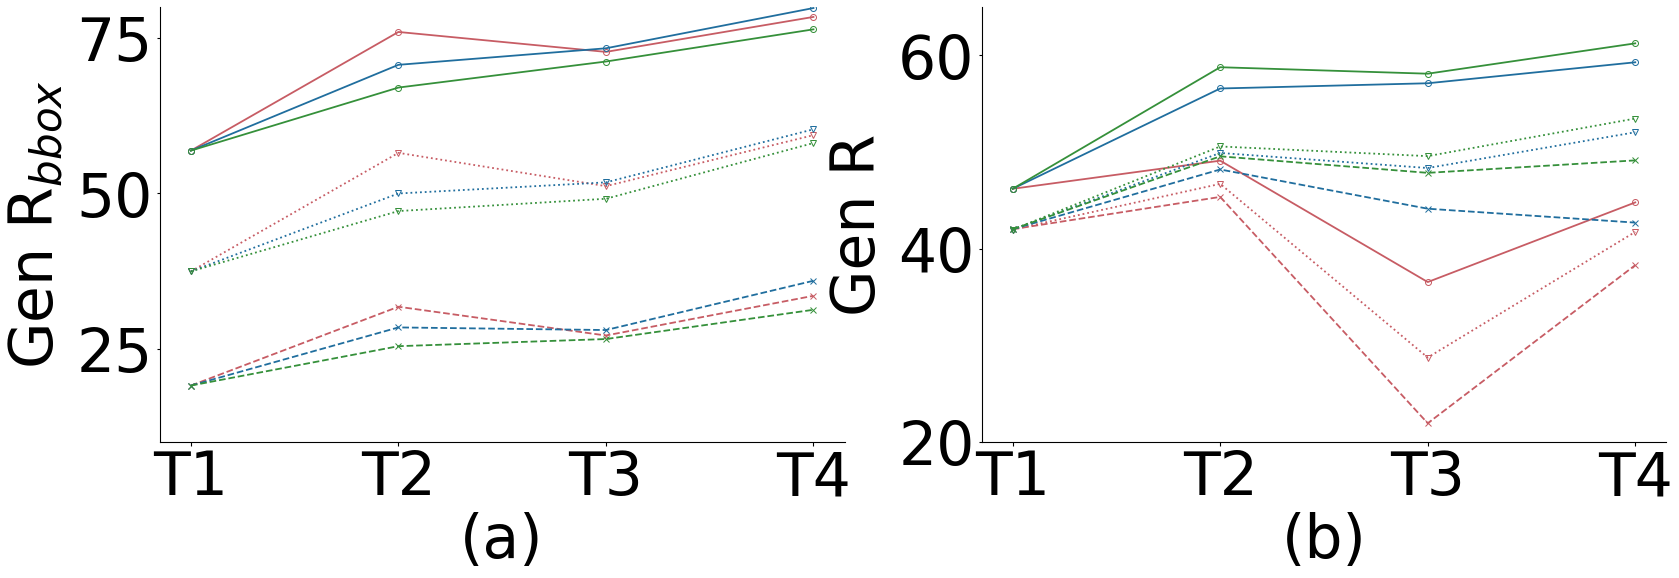

In [17]:
fig, axes = plt.subplots(1, 2,figsize=(27, 8))
color_map = ['#C75C64','#206E9E',  '#35903A', '#71ABB6','#A360AD','#F0B57D']
subtitles = ['(a)','(b)']
linetypes = ['-', ':', '--']
points = ['o', 'v', 'x']
fontsize = 60 

if True:
    fig_title = 'Gen R$_{bbox}$'
    x_labels = ['T{}'.format(i) for i in range(1,5)]
    numbers = all_s3_obj_results
#     print(fig_title)
    for j, result in enumerate(numbers):
        print(j, result)
        ys = [float(y) for y in result[1:]]
        # print(result)
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[0].plot(range(1,5),ys,color=color_map[j//3], label=result[0],lw=1.8, linestyle=linetypes[j%3], marker=points[j%3], markerfacecolor='none')

#         axes[i].set_title(fig_title)
        axes[0].set_xticks(range(1,5),x_labels, fontsize=fontsize)
        axes[0].set_ylim([10,80])
        axes[0].spines[['right', 'top']].set_visible(False)
        axes[0].set_ylabel(fig_title, fontsize=fontsize, labelpad=10.0) 
        axes[0].set_xlabel(subtitles[0], fontsize=fontsize) 
        for axis in ['top','bottom','left','right']:
            axes[0].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[0].tick_params(width=1.1, labelsize=fontsize)
        
        # axes[0].legend(loc='upper center', ncols = 6 , bbox_to_anchor=(0,0.2,1,1),prop={'size': 14},frameon=False, columnspacing=1)

if True:
    fig_title = 'Gen R'
    x_labels = ['T{}'.format(i) for i in range(1,5)]
    numbers = all_s3_recall_results
#     print(fig_title)
    for j, result in enumerate(numbers):
        print(j, result)
        ys = [float(y) for y in result[1:]]
        # print(result)
#         axes[i].plot(range(1,6),ys,color=color_map[j],label=result[0])
        axes[1].plot(range(1,5),ys,color=color_map[j//3],label=result[0],lw=1.8, linestyle=linetypes[j%3], marker=points[j%3], markerfacecolor='none')

#         axes[i].set_title(fig_title)
        axes[1].set_xticks(range(1,5),x_labels, fontsize=fontsize)
        axes[1].set_ylim([20,65])
        axes[1].spines[['right', 'top']].set_visible(False)
        axes[1].set_ylabel(fig_title, fontsize=fontsize, labelpad=10.0) 
        axes[1].set_xlabel(subtitles[1], fontsize=fontsize) 
        for axis in ['top','bottom','left','right']:
            axes[1].spines[axis].set_linewidth(1.1)

        # increase tick width
        axes[1].tick_params(width=1.1, labelsize=fontsize)
        # axes[0].legend(loc='upper center', bbox_to_anchor=(0,0.2,1,1),prop={'size': 14},frameon=False, columnspacing=1)
        #plt.legend(loc='upper center',ncol=12, bbox_to_anchor=(0.5,1.2),prop={'size': 25},frameon=False, columnspacing=1)
        #plt.savefig('final_results_2.png', bbox_inches='tight', dpi = 500)